In [51]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec

import boto3
import os.path as op
import nibabel as nib
%matplotlib inline

In [2]:
subjects = [int(s) for s in np.loadtxt('./hcp900.txt')]

In [3]:
boto3.setup_default_session(profile_name='cirrus')
s3 = boto3.resource('s3')
bucket = s3.Bucket('hcp-dki')

In [4]:
import tempfile
tempfile.TemporaryDirectory()

<TemporaryDirectory '/var/folders/jz/4k438hl91v7gvdd592ct4lpc0000gn/T/tmpzq6n7mn_'>

In [5]:
tempfile.tempdir

'/var/folders/jz/4k438hl91v7gvdd592ct4lpc0000gn/T'

In [6]:
dki_medians = []
dti_medians = []
cod_dki_file = op.join(tempfile.tempdir, 'cod_dki.nii.gz')
cod_dti_file = op.join(tempfile.tempdir, 'cod_dti.nii.gz')
wm_file = op.join(tempfile.tempdir, 'wm_mask.nii.gz')
for subject in subjects:
    try:
        path_dki = '%s/%s_cod_dki.nii.gz' % (subject, subject)
        path_dti = '%s/%s_cod_dti.nii.gz' % (subject, subject)
        path_wm = '%s/%s_white_matter_mask.nii.gz' % (subject, subject)
        bucket.download_file(path_dki, cod_dki_file)
        bucket.download_file(path_dti, cod_dti_file)
        bucket.download_file(path_wm, wm_file)
        mask = nib.load(wm_file).get_data().astype(bool)
        cod_dki = nib.load(cod_dki_file).get_data()[mask]
        cod_dti = nib.load(cod_dti_file).get_data()[mask]
        median_dki = np.nanmedian(cod_dki)
        median_dti = np.nanmedian(cod_dti)
        dki_medians.append(median_dki)
        dti_medians.append(median_dti)
        print("Subject %s works fine!" % subject)
    except Exception as err:
        print("Subject %s seems to have issues" % subject)
        print(err.args)

Subject 100206 works fine!
Subject 100307 works fine!
Subject 100408 works fine!
Subject 100610 works fine!
Subject 101006 works fine!
Subject 101107 works fine!
Subject 101309 works fine!
Subject 101410 works fine!
Subject 101915 works fine!
Subject 102008 seems to have issues
('An error occurred (404) when calling the HeadObject operation: Not Found',)
Subject 102311 works fine!
Subject 102513 works fine!
Subject 102816 works fine!
Subject 103111 works fine!
Subject 103414 works fine!
Subject 103515 works fine!
Subject 103818 works fine!
Subject 104012 works fine!
Subject 104416 works fine!
Subject 104820 works fine!
Subject 105014 works fine!
Subject 105115 works fine!
Subject 105216 works fine!
Subject 105620 works fine!
Subject 105923 works fine!
Subject 106016 works fine!
Subject 106319 works fine!
Subject 106521 works fine!
Subject 107018 works fine!
Subject 107220 seems to have issues
('An error occurred (404) when calling the HeadObject operation: Not Found',)
Subject 107321 w

In [37]:
df = pd.DataFrame(np.array([dti_medians, dki_medians]).T, columns=["DTI", "DKI"])

In [54]:
import matplotlib.pyplot as plt
%matplotlib inline

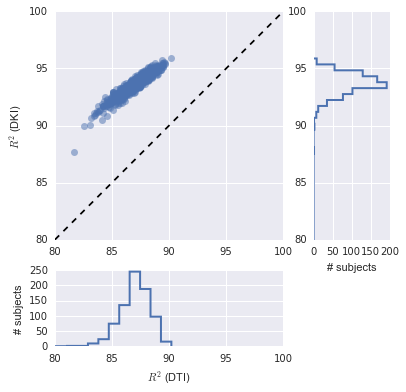

In [83]:
fig, ax = plt.subplots()
gs = gridspec.GridSpec(2, 2, width_ratios=[3,1], height_ratios=[3,1])
ax = plt.subplot(gs[0,0])
axx = plt.subplot(gs[1,0], sharex=ax)
axy = plt.subplot(gs[0,1], sharey=ax)
ax.plot(dti_medians, dki_medians, 'o', alpha=0.5)
axx.hist(dti_medians, bins=40, histtype='step', linewidth=2)
axy.hist(dki_medians, bins=40, histtype='step', linewidth=2, orientation='horizontal')
ax.plot([80, 100], [80, 100], 'k--')
ax.set_ylabel('$R^2$ (DKI)')
axx.set_xlabel('$R^2$ (DTI)')
axx.set_ylabel('# subjects')
axy.set_xlabel('# subjects')
ax.set_xlim([80, 100])
ax.set_ylim([80, 100])
fig.set_size_inches([6, 6])
fig.savefig('first_blood.png')


In [11]:
len(dti_medians)

789

In [14]:
dti_arr = np.array(dti_medians)
dki_arr = np.array(dki_medians)

In [15]:
np.argmin(dti_arr)

19